<a href="https://colab.research.google.com/github/hkrish15/WAVELETS/blob/main/wavelet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.9 MB/s eta 0:00:00


In [ ]:
x=np.array(coeffs[0])
x.shape

(41,)

500


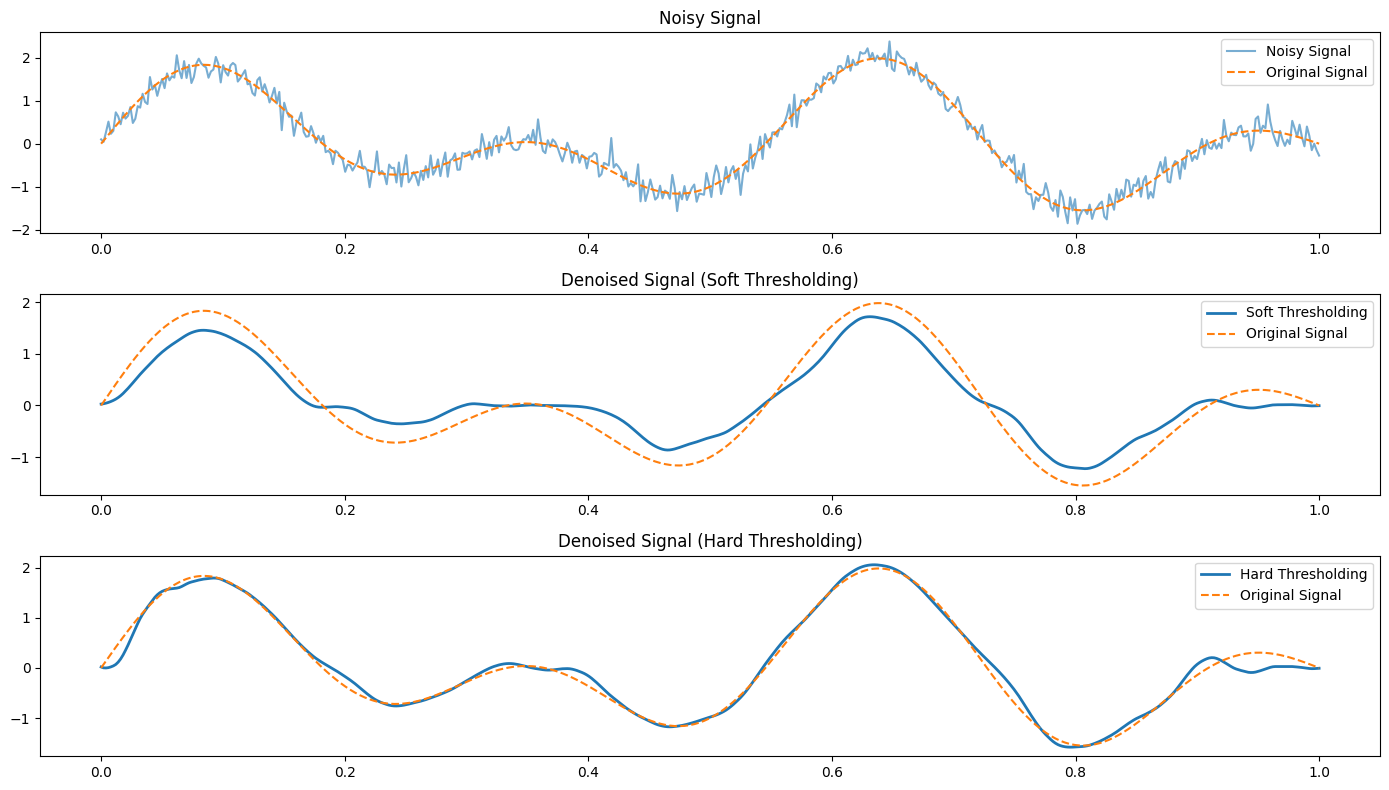

soft: [ 0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0.  0.  0. -0. -0.  0.  0. -0.
  0. -0. -0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0. -0.
  0.  0.  0.  0.  0.]

hard: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
soft: [-0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0.
  0. -0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0. -0. -0. -0.
 -0. -0.  0. -0.  0.  0.  0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0.  0.
  0.  0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0.]

hard: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
soft: [-0.  0. -0. -0. -0.  0.  0.  0. -0. -0. -0.  0.  0. -0.  0. -0. -0.  0.
  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0.  0.  0.  0.  0.
 -0.  0.  0.  0

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Simulated signal with Gaussian white noise
np.random.seed(42)
x = np.linspace(0, 1, 500)
signal = np.sin(4 * np.pi * x) + np.sin(7 * np.pi * x)  # Original signal
noise = np.random.normal(0, 0.2, len(x))  # Gaussian white noise
noisy_signal = signal + noise

print(len(noisy_signal))

# Wavelet parameters
wavelet = 'db6'  # Daubechies wavelet
level = 4        # Decomposition level

# Perform Wavelet Transform
coeffs = pywt.wavedec(noisy_signal, wavelet, level=level)

# Calculate threshold based on noise variance (universal threshold)
threshold = np.sqrt(2 * np.log(len(noisy_signal))) * 0.4
threshold1 = np.sqrt(2 * np.log(len(noisy_signal))) * 0.4

# Apply Soft and Hard Thresholding
soft_coeffs = [pywt.threshold(c, threshold1, mode='soft') for c in coeffs]
hard_coeffs = [pywt.threshold(c, threshold, mode='hard') for c in coeffs]

# Reconstruct the signal for both methods
soft_denoised_signal = pywt.waverec(soft_coeffs, wavelet)
hard_denoised_signal = pywt.waverec(hard_coeffs, wavelet)

# Calculate Mean Squared Error (MSE)
mse_soft = mean_squared_error(signal, soft_denoised_signal[:len(signal)])
mse_hard = mean_squared_error(signal, hard_denoised_signal[:len(signal)])

# Plot noisy and denoised signals
plt.figure(figsize=(14, 8))
plt.subplot(3, 1, 1)
plt.plot(x, noisy_signal, label='Noisy Signal', alpha=0.6)
plt.plot(x, signal, label='Original Signal', linestyle='dashed')
plt.legend()
plt.title('Noisy Signal')

plt.subplot(3, 1, 2)
plt.plot(x, soft_denoised_signal, label='Soft Thresholding', linewidth=2)
plt.plot(x, signal, label='Original Signal', linestyle='dashed')
plt.legend()
plt.title('Denoised Signal (Soft Thresholding)')

plt.subplot(3, 1, 3)
plt.plot(x, hard_denoised_signal, label='Hard Thresholding', linewidth=2)
plt.plot(x, signal, label='Original Signal', linestyle='dashed')
plt.legend()
plt.title('Denoised Signal (Hard Thresholding)')

plt.tight_layout()
plt.show()

# Compare coefficients

# Print Wavelet Coefficients for All Levels
for i in range(1, level + 1):
    print("soft:", soft_coeffs[i])
    print()
    print("hard:", hard_coeffs[i])




